# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [33]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [21]:
# 1. How many rows and columns does the dataset contain?
print(f'The dimension of the data is: {data.shape}')

# 2. Are there any NaN values present?
print(f'Any NaN values among  the data? {data.isna().values.any()}')

# 3. Are there any duplicate rows?
print(f'Any duplicates? {data.duplicated().values.any()}')

# checking the total number of duplicates
print(f'Number of duplicates: {len(data[data.duplicated()])}')


The dimension of the data is: (5391, 6)
Any NaN values among  the data? False
Any duplicates? False
Number of duplicates: 0


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [23]:
chars_to_remove = [',', '$']

columns_to_remove = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for column in columns_to_remove:
    for char in chars_to_remove:
        data[column] = data[column].astype(str).str.replace(char, '')
    
    #  convert column to numeric type
    data[column] = pd.to_numeric(data[column])


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


# **Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [24]:
# data.head(3)

data.Release_Date = pd.to_datetime(data.Release_Date)

# data.info()

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [35]:
# 1. What is the average production budget of the films in the data set? 
print(f"The average production budget is ${data.USD_Production_Budget.mean():.2f}")


The average production budget is $31113737.58


In [37]:
# 2. What is the average worldwide gross revenue of films?
print(f"The average worldwide gross revenue is ${data.USD_Worldwide_Gross.mean():.2f}")

The average worldwide gross revenue is $88855421.96


In [39]:
# 3. What were the minimums for worldwide and domestic revenue?
print(f"The mininum for worldwide revenue is: ${data.USD_Worldwide_Gross.min()}")

print(f"The mininum for domestic revenue is ${data.USD_Domestic_Gross.min():.2f}")

The mininum for worldwide revenue is: $0
The mininum for domestic revenue is $0.00


In [40]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [42]:
# 5. What are the highest production budget and highest worldwide gross revenue of any film?

print(f"The highest production budget of any filmm is: ${data.USD_Production_Budget.max():.2f}")

print(f"The highest worldwide gross revenue of any film is: ${data.USD_Worldwide_Gross.max():.2f}")

The highest production budget of any filmm is: $425000000.00
The highest worldwide gross revenue of any film is: $2783918982.00


In [60]:
# # 6. How much revenue did the lowest and highest budget films make?

lowest_buget_index = data.USD_Production_Budget.idxmin()
lowest_budget_revenue = data.USD_Worldwide_Gross.loc[lowest_buget_index] + data.USD_Domestic_Gross.loc[lowest_buget_index]
print(f"The lowest budgeted film '{data.Movie_Title.loc[lowest_buget_index]}' made ${lowest_budget_revenue:.2f} in total revenue")


highest_budget_index = data.USD_Production_Budget.idxmax()
highest_budget_revenue = data.USD_Worldwide_Gross.loc[highest_budget_index] + data.USD_Domestic_Gross.loc[highest_budget_index]
print(f"The highest budgeted film '{data.Movie_Title.loc[highest_budget_index]}' made ${highest_budget_revenue:.2f} in total revenue")



The lowest budgeted film 'My Date With Drew' made $362082.00 in total revenue
The highest budgeted film 'Avatar' made $3544426607.00 in total revenue


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [64]:
# How many films grossed $0 domestically (i.e., in the United States)? 

zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f"Number of films with domestic gross of $0 is: {len(zero_domestic)}")

# What were the highest budget films that grossed nothing?
zero_domestic.sort_values(by="USD_Production_Budget", ascending=False)


Number of films with domestic gross of $0 is: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [67]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f"The number of fims with $0 worldwide gross is: {len(zero_worldwide)}")

zero_worldwide.sort_values(by='USD_Production_Budget', ascending=False)

The number of fims with $0 worldwide gross is: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [68]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [78]:
international_releases_query = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

display(international_releases_query.head())

print(f"The number of International release is {len(international_releases_query)}")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


The number of International release is 155


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [79]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [85]:
# Identify which films were not released yet as of the time of data collection (May 1st, 2018).

to_be_release = data.query('Release_Date >= @scrape_date')
display(to_be_release)

# How many films are included in the dataset that have not yet had a chance to be screened in the box office?
print(f"Number of films yet to be screened in the box office: {len(to_be_release)}")


# Create another DataFrame called data_clean that does not include these films.
data_clean = data.query('Release_Date < @scrape_date')
display(data_clean.head())

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


Number of films yet to be screened in the box office: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [92]:
losing_money = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')

lose_percent = losing_money.shape[0]/data_clean.shape[0] * 100
print(f"The percentage of films with production budget greater than worldwide gross revenue is: {lose_percent:.2f}%")


The percentage of films with production budget greater than worldwide gross revenue is: 37.28%


# Seaborn for Data Viz: Bubble Charts

In [100]:
data_clean.loc[data_clean.USD_Production_Budget.idxmax()]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



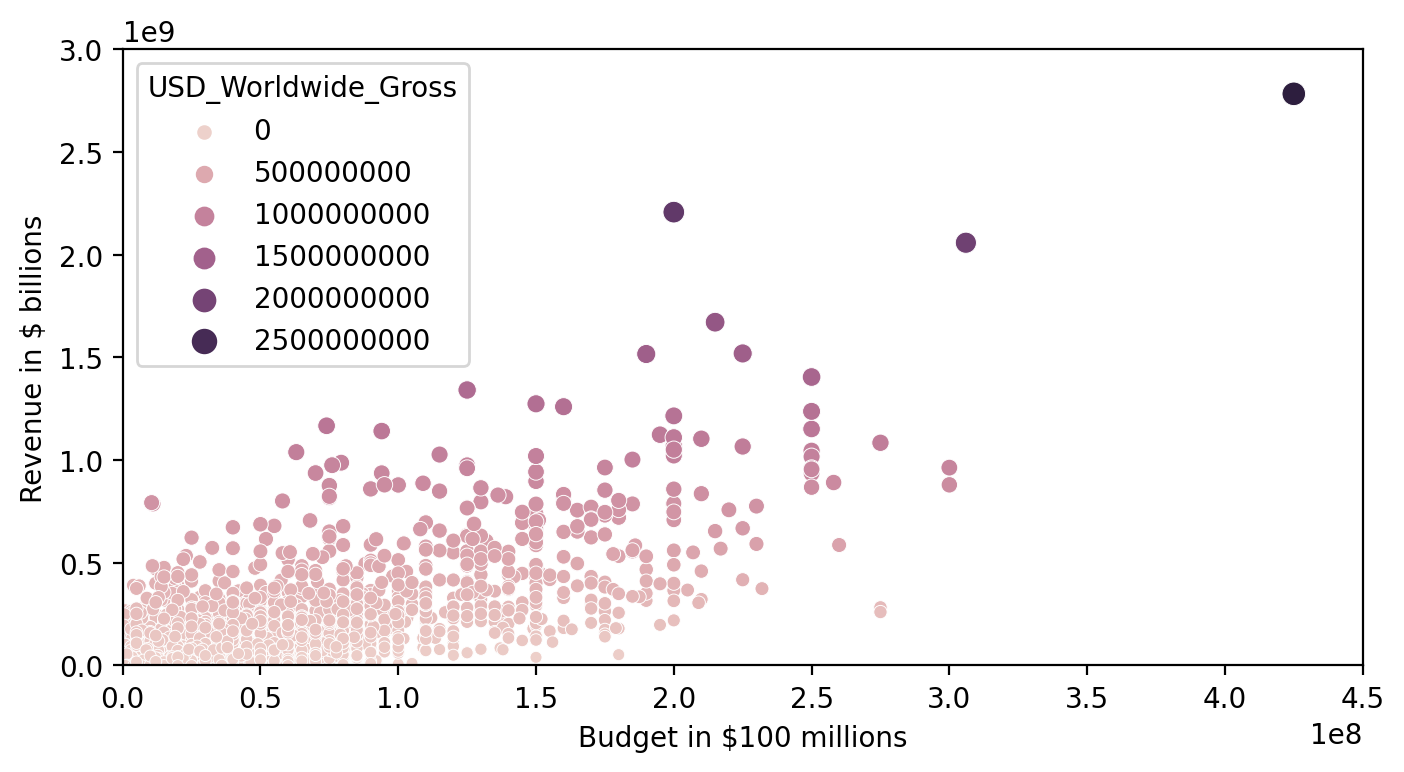

In [96]:
plt.figure(figsize=(8, 4), dpi=200)

ax = sns.scatterplot(data=data_clean,
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
      ylabel='Revenue in $ billions',
      xlabel='Budget in $100 millions')

plt.show()

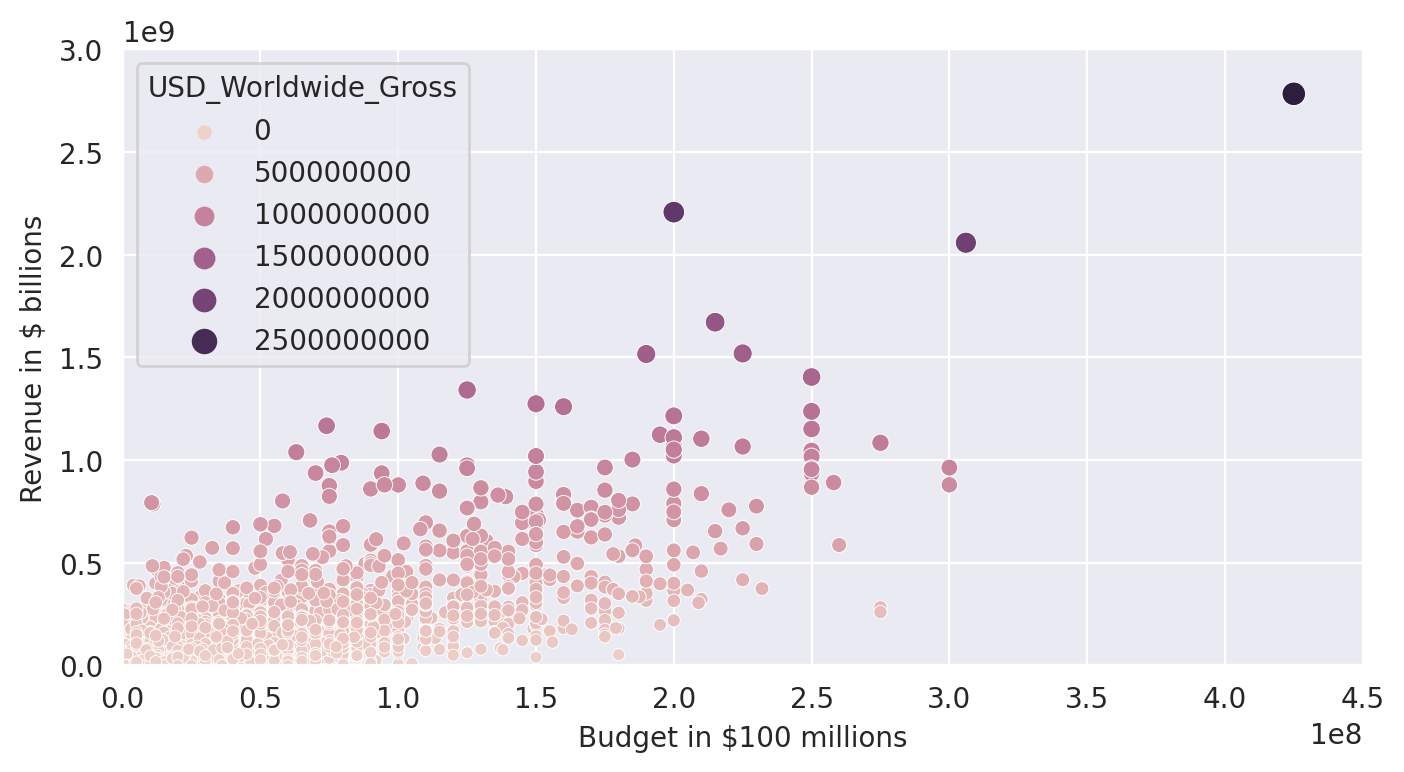

In [101]:
# styling a single plot in seaborn

plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
          ylabel='Revenue in $ billions',
          xlabel='Budget in $100 millions')

plt.show()

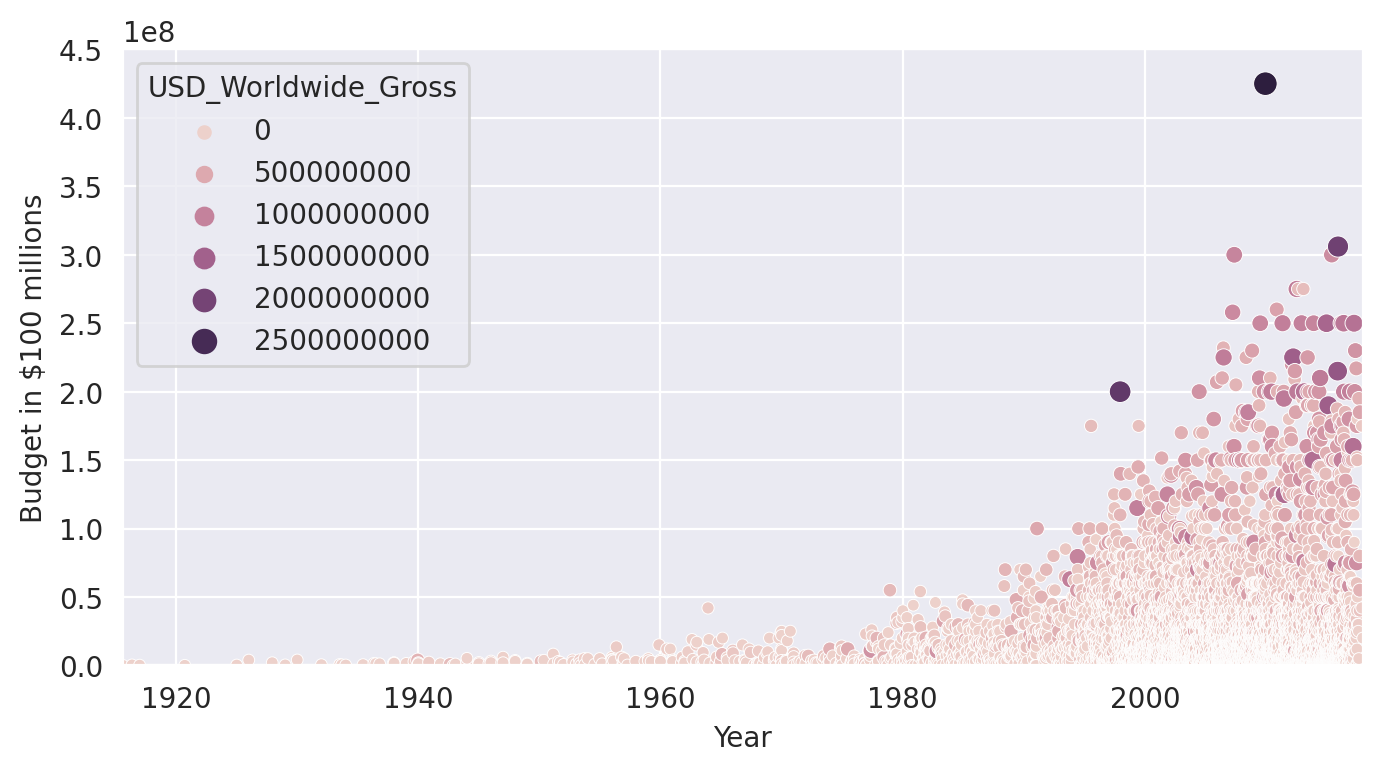

In [106]:
# 3d scatter plot in seaborn

plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                        x='Release_Date',
                        y='USD_Production_Budget',
                        size='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross')
    ax.set(xlabel='Year',
          ylabel='Budget in $100 millions',
          ylim=(0, 450000000),
            xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max())
          )
    
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [110]:
data_clean.Release_Date

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5379   2017-10-02
5380   2017-10-03
5381   2017-12-05
5382   2017-12-05
5383   2017-12-31
Name: Release_Date, Length: 5384, dtype: datetime64[ns]

In [122]:
decade_column = pd.DatetimeIndex(data=data_clean.Release_Date)

new_column = (decade_column.year // 10) * 10

data_clean.insert(loc=len(data_clean.columns), column='Decade',
                 value=new_column)

data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [130]:
# old_films

date_threshold = pd.Timestamp('1970-01-01')

old_films = data_clean.query('Release_Date < @date_threshold')

display(old_films.tail())

print(f"Number of films released prior to 1970 is: {old_films.shape[0]}")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960
152,4195,1969-12-19,Topaz,4000000,6000000,6000000,1960


Number of films released prior to 1970 is: 153


In [142]:
# inspecting old_films

old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


In [129]:
# new films

new_films = data_clean.query('Release_Date >= @date_threshold')

display(new_films.head())

print(f"Number of films released after 1970 is: {new_films.shape[0]}")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


Number of films released after 1970 is: 5231


In [141]:
old_films.loc[old_films.USD_Production_Budget.idxmax()]

Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object

# Seaborn Regression Plots

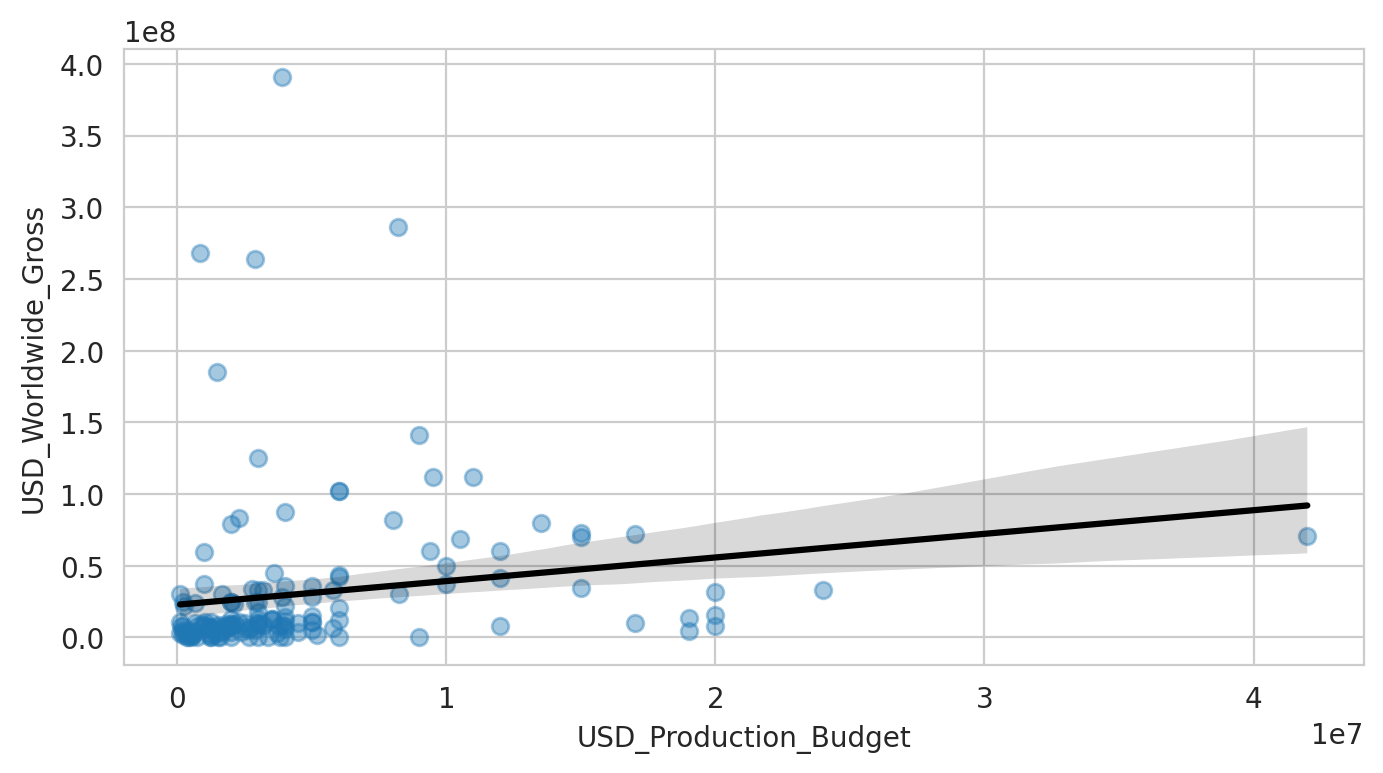

In [145]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('whitegrid'):
    sns.regplot(data=old_films,
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross',
               scatter_kws={'alpha': 0.4},
               line_kws={'color': 'black'})

# plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

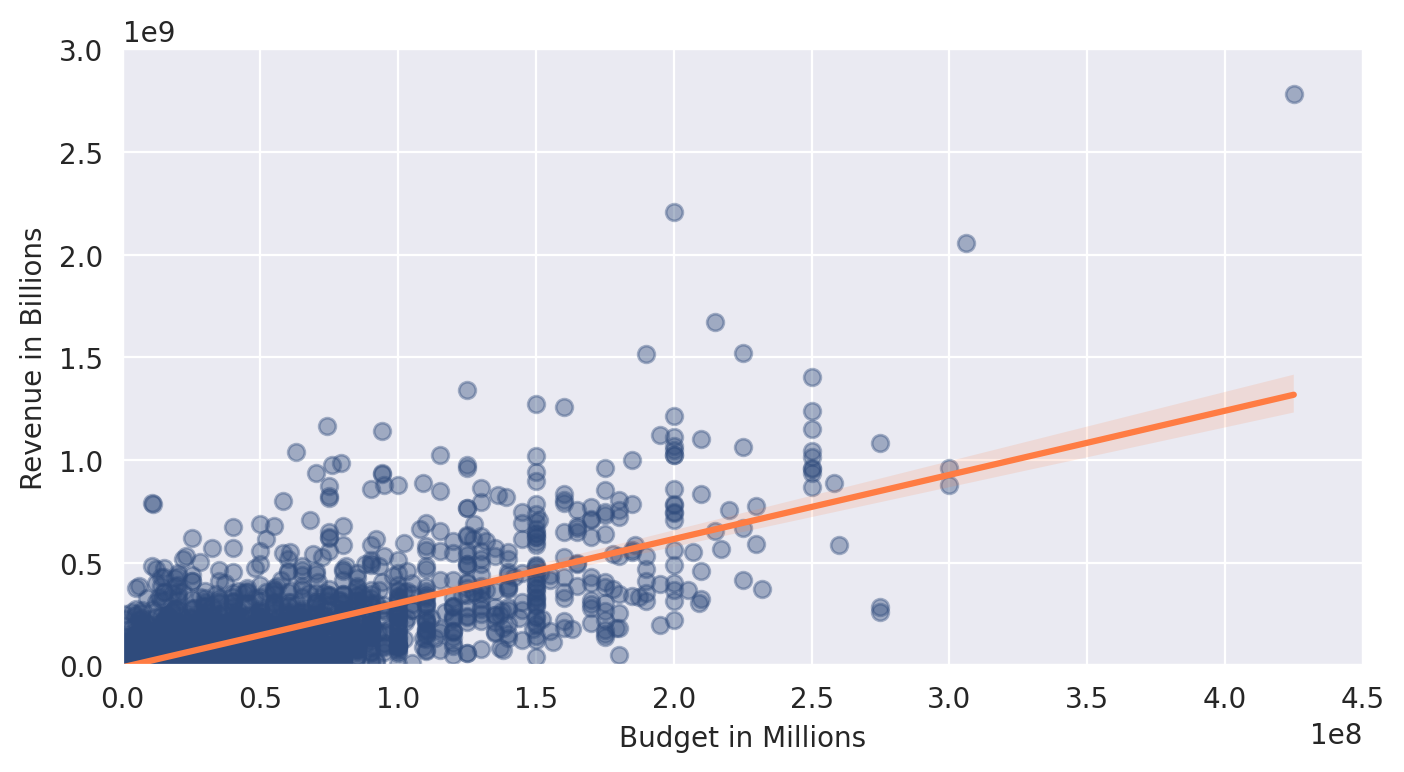

In [147]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films,
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross',
               scatter_kws={'alpha': 0.4},
               line_kws={'color': '#ff7c43'},
                    color='#2f4b7c')
    
    ax.set(ylabel='Revenue in Billions',
          xlabel='Budget in Millions',
          ylim=(0, 3000000000),
         xlim=(0, 450000000))

plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [155]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

# Theta zero
y_intercept = regression.intercept_
print(f"The intercept is: {y_intercept}")

# Theta one
slope = regression.coef_
print(f"The slope coefficient is: {slope[0]}")

# R-Squared: Goodness of fit
r_squared = regression.score(X, y)

print(f"The r-squared is: {r_squared}")

The intercept is: [-8650768.00661024]
The slope coefficient is: [3.12259592]
The r-squared is: 0.5577032617720403


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [157]:
# Explanatory Variable 
X1 = pd.DataFrame(data=old_films, columns=['USD_Production_Budget'])

# Target Variable
y1 = pd.DataFrame(data=old_films, columns=['USD_Worldwide_Gross'])

# Fit the best-line
reg_old = regression.fit(X1, y1)

# Theta zero
old_intercept = reg_old.intercept_
print(f"The intercept is: {old_intercept}")

# Theta one
old_slope = reg_old.coef_
print(f"The slope coefficient is: {old_slope[0]}")

# R-Squared
old_r_squared = reg_old.score(X1, y1)
print(f"The r-squared is: {old_r_squared}")


The intercept is: [22821538.63508038]
The slope coefficient is: [1.64771314]
The r-squared is: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [163]:
# predicting base on old_films dataset

predict1 = y_intercept[0] + slope[0, 0] * 350_000_000

print(f'The estimated revenue base on old_films is: ${predict1:.2f}')

The estimated revenue base on old_films is: $1084257803.06


In [164]:
# predicting base on new_films dataset

predict2 = old_intercept[0] + old_slope[0, 0] * 350_000_000
print(f'The estimated revenue base on new_films is: ${predict2:.2f}')

The estimated revenue base on new_films is: $599521139.04
